In [42]:
# Ignore Warnings.
import warnings
warnings.filterwarnings("ignore")
# Import the libraries.
# Import pandas.
import pandas as pd
# Import numpy.
import numpy as np
# Import matplotlib.
import matplotlib.pyplot as plt
# Import seaborn.
import seaborn as sns
# Import regular expression.
import re
# import datetime.
import datetime as dt

In [43]:
#Read the input file
df = pd.read_csv(r'C:/Users/iDIGITAL/Desktop/Gt Challege/wfpdisrel/#task4-eda/datasets/OUTPUT_WBI_exposer_cyclones_v7.csv', sep=",")

In [44]:
df.head(10)

,Unnamed: 0,SID,NAME,ISO,YEAR,BASIN,SUB BASIN,NATURE,ISO_TIME,COORDS,...,Adjusted savings: education expenditure (% of GNI),Rural population (% of total population),Income_level_Final,pop_max_34,pop_max_50,pop_max_64,TOTAL_AFFECTED,pop_max_34_adj,pop_max_50_adj,pop_max_64_adj
0,0,1949163N07145,DELLA,JPN,1949,WP,WP,TS,"['1949-06-21 03:00:00', '1949-06-22 03:00:00',...","[[35.67, 130.99], [38.35, 135.07], [38.82, 136...",...,2.867878,36.728,Low,16278929.0,4.378624e+06,7.321548e+05,194046,0,0,0
1,1,1950241N23140,JANE,JPN,1950,WP,WP,ET,"['1950-09-02 18:00:00', '1950-09-03 12:00:00',...","[[31.71, 134.12], [38.48, 137.98], [46.7, 152.8]]",...,2.867878,36.728,Low,39024004.0,1.455101e+07,4.093306e+06,642117,0,0,0
2,2,1951224N12316,CHARLIE,JAM,1951,NAm,CS,TS,"['1951-08-17 21:00:00', '1951-08-18 12:00:00']","[[17.34, -75.41], [18.3, -79.4]]",...,2.578304,66.231,Low,2753687.5,2.606976e+06,1.067878e+06,20200,0,0,0
3,3,1951337N09150,AMY,PHL,1951,WP,WP,TS,"['1951-12-08 18:00:00', '1951-12-08 21:00:00',...","[[11.52, 127.35], [11.34, 127.09], [11.17, 126...",...,2.757732,69.703,Low_Middle,14110069.0,8.444818e+06,1.750716e+06,60000,0,0,0
4,4,1952180N05144,EMMA,PHL,1952,WP,WP,TS,"['1952-07-01 18:00:00', '1952-07-01 21:00:00',...","[[9.57, 127.79], [9.63, 127.19], [12.38, 119.4...",...,2.757732,69.703,Low_Middle,15200242.0,7.952954e+06,4.470182e+06,103,0,0,0
5,5,1954278N12302,HAZEL,HTI,1954,NAm,CS,TS,"['1954-10-11 18:00:00', '1954-10-11 21:00:00',...","[[16.9, -74.9], [17.14, -74.81], [17.4, -74.7]]",...,1.284442,84.407,Low_Middle,5543368.0,1.411192e+06,5.954847e+05,250000,0,0,0
6,6,1955255N19294,HILDA,MEX,1955,NAm,GM,TS,"['1955-09-16 03:00:00', '1955-09-16 06:00:00',...","[[19.29, -85.9], [19.4, -86.4], [20.91, -91.56...",...,3.003239,49.247,Low,6833312.0,1.973763e+06,1.474285e+06,11432,0,0,0
7,7,1957261N12135,GLORIA,HKG,1957,WP,WP,TS,"['1957-09-22 09:00:00', '1957-09-22 00:00:00',...","[[21.66, 113.97], [21.17, 115.03], [21.08, 114...",...,2.098984,14.800,High,NaN,NaN,NaN,111,0,0,0
8,8,1959263N11160,VERA,JPN,1959,WP,WP,TS,"['1959-09-26 09:00:00', '1959-09-26 12:00:00',...","[[33.63, 135.69], [35.2, 136.47], [36.89, 137....",...,2.867878,36.728,Low,40783004.0,6.812950e+06,1.247277e+06,1500000,0,0,0
9,9,1960154N17116,MARY,HKG,1960,WP,WP,TS,"['1960-06-08 12:00:00', '1960-06-08 15:00:00',...","[[21.88, 113.8], [22.11, 113.82], [22.34, 113....",...,2.098984,14.800,High,NaN,NaN,NaN,15127,0,0,0


In [45]:
# Displaythe columns
df.columns

Index(['Unnamed: 0', 'SID', 'NAME', 'ISO', 'YEAR', 'BASIN', 'SUB BASIN',
       'NATURE', 'ISO_TIME', 'COORDS', 'TOTAL_HRS', 'DAY_HRS', 'NIGHT_HRS',
       'USA_SSHS', 'WIND_CAL_MIN', 'WIND_CAL_MAX', 'WIND_CALC_MEAN',
       'PRES_CAL_MIN', 'PRES_CAL_MAX', 'PRES_CALC_MEAN', 'STORM_SPD_MIN',
       'STORM_SPD_MAX', 'STORM_SPD_MEAN', 'STORM_DR_MIN', 'STORM_DR_MAX',
       'STORM_DR_MEAN', 'V_LAND_KN', '34KN_ASSETS', '64KN_ASSETS',
       '96KN_ASSETS', 'CPI', 'TOTAL_DAMAGE_(000$)', 'TOTAL_DEATHS',
       'Air transport, freight (million ton-km)',
       'Arable land (hectares per person)', 'Cereal yield (kg per hectare)',
       'Food production index (2004-2006 = 100)', 'GDP growth (annual %)',
       'GDP per capita (constant 2010 US$)', 'Net flows from UN agencies US$',
       'Life expectancy at birth, total (years)',
       'Mobile cellular subscriptions (per 100 people)',
       'Population density (people per sq. km of land area)',
       'Adjusted savings: education expenditure (

In [46]:
#Select the requiredcolumns
df2 = df[['SID','COORDS']]

In [47]:
#Set the SID as index
#df2.set_index('SID', inplace=True)
# create a empty  list
rows = []
#df2.reset_index(inplace=True)
#Split the rows based on , for getting lat /longs or each SID
_= df2.apply(lambda row: [rows.append([row['SID'], nn]) 
                         for nn in row.COORDS.split(',')], axis=1)
 #create data frame and Sst idex to SID
df_new = pd.DataFrame(rows, columns=df2.columns).set_index(['SID'])
#Reset the index
df_new.reset_index(inplace=True)
#String manipulations 
df_new['COORDS'] = df_new['COORDS'].str.replace("[", "").str.replace("]", "")
#Concate SID to the lat longs
new_df3 = pd.DataFrame({'SID':df_new['SID'].iloc[0::2].values, 'lat':df_new['COORDS'].iloc[::2].values, 'long':df_new['COORDS'].iloc[1::2].values})
new_df3

,SID,lat,long
0,1949163N07145,35.67,130.99
1,1949163N07145,38.35,135.07
2,1949163N07145,38.82,136.18
3,1949163N07145,39.15,137.11
4,1949163N07145,39.47,138.0
...,...,...,...
15442,2019117N05088,19.0,85.5
15443,2019117N05088,19.55,85.68
15444,2019117N05088,16.7,84.9
15445,2019117N05088,17.16,84.87


In [48]:
final_df = pd.merge(new_df3, df,  how='left', left_on=['SID'], right_on = ['SID'])
final_df.shape

(26979, 55)

In [49]:
final_df.dropna(axis=0,how='any',subset=['lat','long'],inplace=True)

In [50]:
final_df.shape

(26979, 55)

In [27]:
final_df.columns

Index(['SID', 'lat', 'long', 'Unnamed: 0', 'NAME', 'ISO', 'YEAR', 'BASIN',
       'SUB BASIN', 'NATURE', 'ISO_TIME', 'COORDS', 'TOTAL_HRS', 'DAY_HRS',
       'NIGHT_HRS', 'USA_SSHS', 'WIND_CAL_MIN', 'WIND_CAL_MAX',
       'WIND_CALC_MEAN', 'PRES_CAL_MIN', 'PRES_CAL_MAX', 'PRES_CALC_MEAN',
       'STORM_SPD_MIN', 'STORM_SPD_MAX', 'STORM_SPD_MEAN', 'STORM_DR_MIN',
       'STORM_DR_MAX', 'STORM_DR_MEAN', 'V_LAND_KN', '34KN_ASSETS',
       '64KN_ASSETS', '96KN_ASSETS', 'CPI', 'TOTAL_DAMAGE_(000$)',
       'TOTAL_DEATHS', 'Air transport, freight (million ton-km)',
       'Arable land (hectares per person)', 'Cereal yield (kg per hectare)',
       'Food production index (2004-2006 = 100)', 'GDP growth (annual %)',
       'GDP per capita (constant 2010 US$)', 'Net flows from UN agencies US$',
       'Life expectancy at birth, total (years)',
       'Mobile cellular subscriptions (per 100 people)',
       'Population density (people per sq. km of land area)',
       'Adjusted savings: educatio

In [75]:
# Extract the data we're interested in:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
lat = final_df['lat'].values
lon = final_df['long'].values
#TOTAL_AFFECTED = final_df['TOTAL_AFFECTED'].values
#NATURE = final_df['NATURE'].values

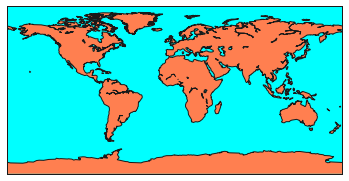

In [90]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

map = Basemap(projection='cyl')

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()

plt.show()

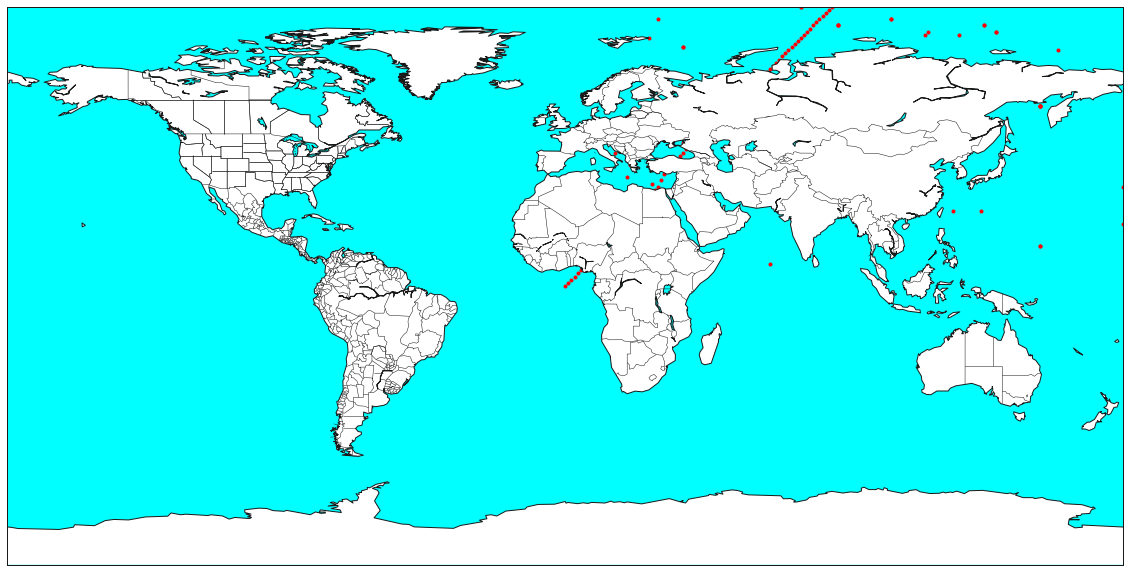

In [117]:
from mpl_toolkits.basemap import Basemap
fig = plt.figure(figsize=(20, 20))
import matplotlib.pyplot as plt

map = Basemap(projection='cyl', 
              lat_0=0, lon_0=0)

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='white',lake_color='aqua')
map.drawcoastlines()
map.drawcountries()
map.drawstates()

x, y = map(lon, lat)

marker = '.'
#map.scatter(x, y, marker='D',color='m')
map.scatter(x, y, marker=marker, color='red')

plt.show()

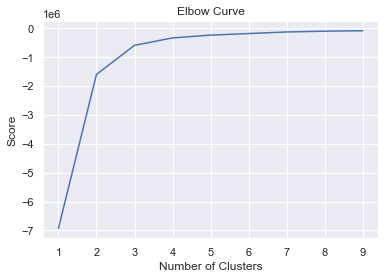

In [122]:
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = final_df[['lat']]
X_axis = final_df[['long']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [125]:
data_2 = final_df[['BASIN','NATURE']]
data_3 = pd.get_dummies(data_2)
df_scaled = pd.merge(final_df, data_3, how='inner', left_index=True, right_index=True)

In [127]:
df_scaled.columns

Index(['SID', 'lat', 'long', 'Unnamed: 0', 'NAME', 'ISO', 'YEAR', 'BASIN',
       'SUB BASIN', 'NATURE', 'ISO_TIME', 'COORDS', 'TOTAL_HRS', 'DAY_HRS',
       'NIGHT_HRS', 'USA_SSHS', 'WIND_CAL_MIN', 'WIND_CAL_MAX',
       'WIND_CALC_MEAN', 'PRES_CAL_MIN', 'PRES_CAL_MAX', 'PRES_CALC_MEAN',
       'STORM_SPD_MIN', 'STORM_SPD_MAX', 'STORM_SPD_MEAN', 'STORM_DR_MIN',
       'STORM_DR_MAX', 'STORM_DR_MEAN', 'V_LAND_KN', '34KN_ASSETS',
       '64KN_ASSETS', '96KN_ASSETS', 'CPI', 'TOTAL_DAMAGE_(000$)',
       'TOTAL_DEATHS', 'Air transport, freight (million ton-km)',
       'Arable land (hectares per person)', 'Cereal yield (kg per hectare)',
       'Food production index (2004-2006 = 100)', 'GDP growth (annual %)',
       'GDP per capita (constant 2010 US$)', 'Net flows from UN agencies US$',
       'Life expectancy at birth, total (years)',
       'Mobile cellular subscriptions (per 100 people)',
       'Population density (people per sq. km of land area)',
       'Adjusted savings: educatio

In [129]:
# Variable with the Longitude and Latitude
X=df_scaled.loc[:,['BASIN_EP','BASIN_NAm', 'BASIN_NI', 'BASIN_SI', 'BASIN_SP', 'BASIN_WP','NATURE_DS', 'NATURE_ET', 'NATURE_MX', 'NATURE_NR', 'NATURE_SS',
       'NATURE_TS','lat','long','TOTAL_AFFECTED']]
X.head(10)

,BASIN_EP,BASIN_NAm,BASIN_NI,BASIN_SI,BASIN_SP,BASIN_WP,NATURE_DS,NATURE_ET,NATURE_MX,NATURE_NR,NATURE_SS,NATURE_TS,lat,long,TOTAL_AFFECTED
0,0,0,0,0,0,1,0,0,0,0,0,1,35.67,130.99,194046
1,0,0,0,0,0,1,0,0,0,0,0,1,38.35,135.07,194046
2,0,0,0,0,0,1,0,0,0,0,0,1,38.82,136.18,194046
3,0,0,0,0,0,1,0,0,0,0,0,1,39.15,137.11,194046
4,0,0,0,0,0,1,0,0,0,0,0,1,39.47,138.0,194046
5,0,0,0,0,0,1,0,0,0,0,0,1,41.7,145.0,194046
6,0,0,0,0,0,1,0,0,0,0,0,1,42.06,146.0,194046
7,0,0,0,0,0,1,0,0,0,0,0,1,44.0,149.5,194046
8,0,0,0,0,0,1,0,0,0,0,0,1,44.95,150.75,194046
9,0,0,0,0,0,1,0,1,0,0,0,0,31.71,134.12,642117


In [130]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

,BASIN_EP,BASIN_NAm,BASIN_NI,BASIN_SI,BASIN_SP,BASIN_WP,NATURE_DS,NATURE_ET,NATURE_MX,NATURE_NR,NATURE_SS,NATURE_TS,lat,long,TOTAL_AFFECTED,cluster_label
0,0,0,0,0,0,1,0,0,0,0,0,1,35.67,130.99,194046,1
1,0,0,0,0,0,1,0,0,0,0,0,1,38.35,135.07,194046,1
2,0,0,0,0,0,1,0,0,0,0,0,1,38.82,136.18,194046,1
3,0,0,0,0,0,1,0,0,0,0,0,1,39.15,137.11,194046,1
4,0,0,0,0,0,1,0,0,0,0,0,1,39.47,138.0,194046,1
5,0,0,0,0,0,1,0,0,0,0,0,1,41.7,145.0,194046,1
6,0,0,0,0,0,1,0,0,0,0,0,1,42.06,146.0,194046,1
7,0,0,0,0,0,1,0,0,0,0,0,1,44.0,149.5,194046,1
8,0,0,0,0,0,1,0,0,0,0,0,1,44.95,150.75,194046,1
9,0,0,0,0,0,1,0,1,0,0,0,0,31.71,134.12,642117,1


In [134]:
centers

array([[ 1.00000000e+00,  2.58473798e-15],
       [ 5.78981307e-14,  5.37417333e-15],
       [-3.94129174e-15,  1.00000000e+00]])

In [135]:
labels

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

In [136]:
X

,BASIN_EP,BASIN_NAm,BASIN_NI,BASIN_SI,BASIN_SP,BASIN_WP,NATURE_DS,NATURE_ET,NATURE_MX,NATURE_NR,NATURE_SS,NATURE_TS,lat,long,TOTAL_AFFECTED,cluster_label
0,0,0,0,0,0,1,0,0,0,0,0,1,35.67,130.99,194046,1
1,0,0,0,0,0,1,0,0,0,0,0,1,38.35,135.07,194046,1
2,0,0,0,0,0,1,0,0,0,0,0,1,38.82,136.18,194046,1
3,0,0,0,0,0,1,0,0,0,0,0,1,39.15,137.11,194046,1
4,0,0,0,0,0,1,0,0,0,0,0,1,39.47,138.0,194046,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26974,0,0,1,0,0,0,0,0,0,1,0,0,19.0,85.5,20000000,2
26975,0,0,1,0,0,0,0,0,0,1,0,0,19.55,85.68,20000000,2
26976,0,0,1,0,0,0,0,0,0,1,0,0,16.7,84.9,20000000,2
26977,0,0,1,0,0,0,0,0,0,1,0,0,17.16,84.87,20000000,2


In [138]:
# Convert the latitude and longitude Column to numeric type.
X['lat'] = X['lat'].astype(float)
X['long'] = X['long'].astype(float)

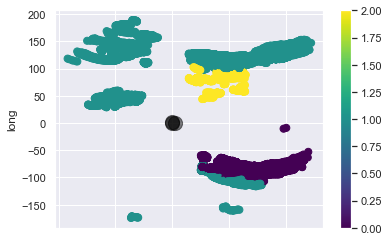

In [140]:
X.plot.scatter(x = 'lat', y = 'long', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)